### Анализ данных из Росстат

In [1]:
%pip install openpyxl

     ------------------------------------ 250.0/250.0 kB 464.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# загрузка данных
df_0 = pd.read_excel("data/sred_potreb_cen_1991-2023.xlsx", sheet_name=1, skiprows=2, decimal=',')
df_0.head(10)

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Средние потребительские цены на отдельные виды...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17,519.83
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92,344.82
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22,227.58
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16,513.77
5,Консервы мясные3),8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,94.42,117.04,121.37,125.21,130.13,139.47,153.5,167.04,580.06,603.15
6,Рыба мороженая неразделанная4),2.32,129.5,1088.73,3675.17,8325,9398,9912,18.93,23.83,...,110.65,138.16,147.68,153.03,152.14,170.13,181.08,192.61,207.56,227.37
7,"Рыба соленая, маринованная, копченая",5.72,272.6,2598.96,7495.95,17488,19912,21402,32.13,47.89,...,292.21,352.58,382.54,388.83,398.24,424.54,453.54,525.66,597.77,629.34
8,Консервы рыбные натуральные и с добавлением ма...,3.91,120,1040.71,3211.18,8050,8540,8468,13.85,19.96,...,70.12,91.94,103.94,109.09,113.71,119.69,135.03,156.01,534.69,548.64
9,Масло сливочное 6),12.24,413,2912.58,12984.99,20075,22968,23238,64.44,66.83,...,357.54,397.75,477.13,528.83,553.02,613.39,638.69,719.21,835.77,862.87


In [16]:
# удаление строк с пустыми значениями
df_0 = df_0.dropna()
df_0.head

<bound method NDFrame.head of                                           ПОКАЗАТЕЛИ    1991    1992     1993  \
1                   Говядина (кроме бескостного мяса)  15.54   221.5  2201.27   
2                    Свинина (кроме бескостного мяса)  14.38     260  2672.81   
3                      Куры охлажденные и мороженые1)  13.57  194.76  2238.98   
4                                   Колбаса вареная2)     17     271   3351.3   
5                                   Консервы мясные3)   8.87   163.9  1165.48   
..                                                ...    ...     ...      ...   
84           Посещение детского ясли-сада, за день36)   0.59   17.34      249   
85                             Санаторий37), за день   30.17  618.53    10304   
86                 Дом отдыха, пансионат38), за день   19.64  360.03     6664   
87  Первичный консультативный прием у врача-специа...   10.5  122.61     1614   
88                              Общий анализ крови39)   4.54   48.02      777  

In [17]:
df_0.shape

(86, 34)

In [18]:
df_0.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [19]:
# для удобства конвертируем значения ключей в строковой тип данных
df_0.columns = df_0.columns.astype("str")
df_0.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [20]:
# транспонирование
df_1 = df_0.T
df_1.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови39)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [21]:
# переименование индекса "ПОКАЗАТЕЛИ" в "годы"
df_1 = df_1.rename(index={' ПОКАЗАТЕЛИ ': "годы"})
df_1.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови39)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [22]:
# в качестве ключей устанавливаем категории товаров и услуг
df_1.columns = df_1.loc["годы", :]
df_1.head()

годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления35), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови39)
годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови39)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [23]:
df_1 = df_1.drop("годы")
df_1.head()

годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления35), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови39)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,…,951,8077,3886,6185,2638,90428,60847,20704,10471


In [24]:
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6) ', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры твердые, полутвердые и мягкие9)', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов10)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта11)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка 12), за л', 'Коньяк ординарный отечественный13), за  л',
       'Вино игристое отечественное14), за  л', 'Пиво15), за л',
       'Пальто (полупальто) женское с

In [25]:
# удаление лишних символов пробела перед и после названий ключей
df_1.columns = df_1.columns.str.strip(" ")
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры твердые, полутвердые и мягкие9)', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов10)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта11)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка 12), за л', 'Коньяк ординарный отечественный13), за  л',
       'Вино игристое отечественное14), за  л', 'Пиво15), за л',
       'Пальто (полупальто) женское с в

In [27]:
# попытка конвертации данных в тип float
df_1 = df_1.astype("float")

ValueError: could not convert string to float: '…'

In [28]:
# замена '…' на 0
df_1 = df_1.replace('…', 0)

C:\Users\NNS\AppData\Local\Temp\ipykernel_17812\3477135367.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1 = df_1.replace('…', 0)


In [29]:
# замена '...' на 0
df_1 = df_1.replace('...', 0)

C:\Users\NNS\AppData\Local\Temp\ipykernel_17812\1662795286.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1 = df_1.replace('...', 0)


In [30]:
# попытка конвертации данных в тип float
df_1 = df_1.astype("float")

In [31]:
# сохранеине в виде эксель
df_1.to_excel("data/my_rosstat.xlsx")

In [33]:
df_1['Говядина (кроме бескостного мяса)']

1991       15.54
1992      221.50
1993     2201.27
1994     5186.28
1995    12547.00
1996    14137.00
1997    15787.00
1998       30.04
1999       42.01
2000       52.72
2001       70.33
2002       72.56
2003       73.90
2004       93.41
2005      115.77
2006      131.67
2007      139.49
2008      174.86
2009      185.60
2010      197.64
2011      234.49
2012      248.47
2013      244.55
2014      272.28
2015      314.94
2016      315.02
2017      320.34
2018      330.58
2019      350.05
2020      361.04
2021      416.46
2022      484.17
2023      519.83
Name: Говядина (кроме бескостного мяса), dtype: float64

In [34]:
# срез датафрейма
df_2 = df_1.loc["1998":, :]
df_2.head()

годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления35), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови39)
1998,30.04,33.99,30.74,43.81,15.50,18.93,32.13,13.85,64.44,23.43,...,0.0,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.90,24.40
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,0.0,4.31,25.40,13.09,25.12,7.90,264.25,197.90,52.67,31.22
2000,52.72,58.45,48.80,77.97,19.52,29.54,61.22,21.15,69.12,23.20,...,0.0,5.66,39.16,23.11,33.60,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,0.0,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.60,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,0.0,9.47,70.85,48.66,61.77,15.50,551.39,426.89,99.77,59.21


In [35]:
# во сколько раз изменилось средняя цена за весь период
product = 'Говядина (кроме бескостного мяса)'

df_2.loc["2023", product] / df_2.loc["1998", product]

17.304593874833557

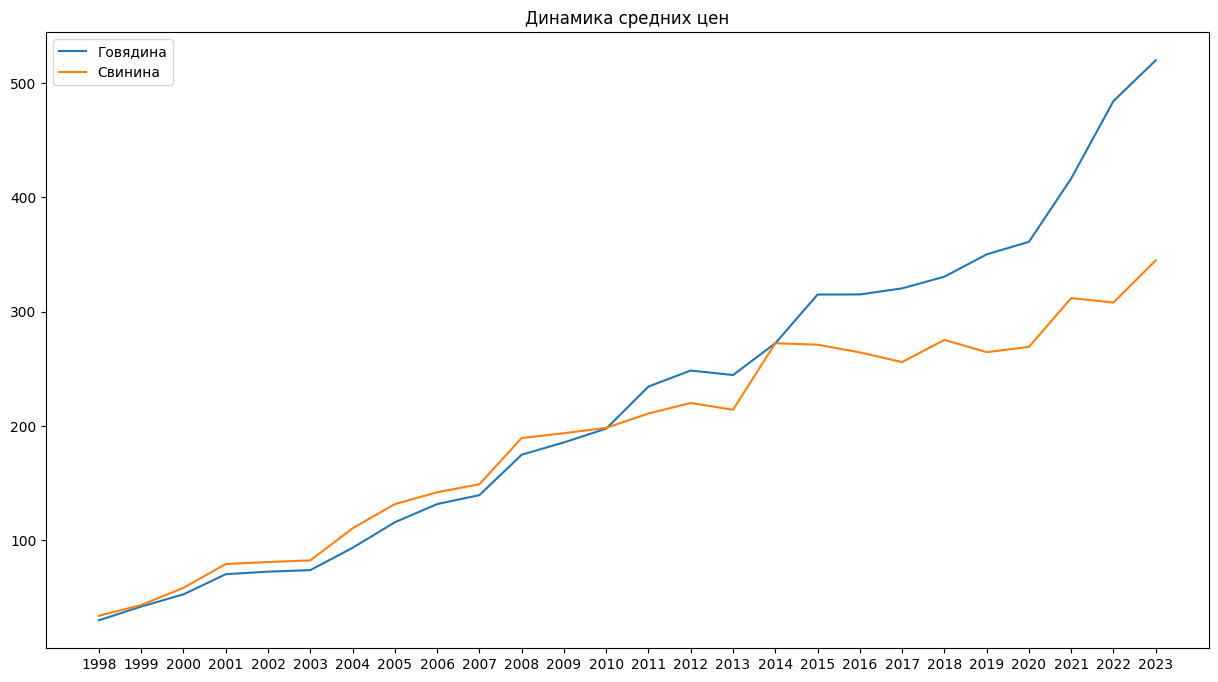

In [39]:
# график динамики изменения средней цены

product_1 = 'Говядина (кроме бескостного мяса)'
product_2 = 'Свинина (кроме бескостного мяса)'

plt.figure(figsize=(15, 8))

plt.plot(df_2.index, df_2[product_1])
plt.plot(df_2.index, df_2[product_2])

plt.legend(["Говядина", "Свинина"])
plt.title("Динамика средних цен")

plt.show()

In [32]:
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры твердые, полутвердые и мягкие9)', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов10)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта11)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка 12), за л', 'Коньяк ординарный отечественный13), за  л',
       'Вино игристое отечественное14), за  л', 'Пиво15), за л',
       'Пальто (полупальто) женское с в